# PSTH Analysis with digitalin.dat Loading

This notebook demonstrates how to load interval data from digitalin.dat files instead of CSV files for PSTH analysis.

## Key Features:
- Load binary digitalin.dat files using TTL extraction
- Extract pico intervals from channel 0
- Extract time markers from channel 1 (optional)
- Compatible with existing PSTH analysis pipeline

## File Structure:
- `digitalin.dat` - Binary digital input file with TTL events
- `spikes.csv` - Spike times (same as before)
- Channel 0: Pico intervals
- Channel 1: Time markers

In [1]:
# Import required modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add current directory to path for imports
sys.path.append('.')

# Import our custom modules
from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility
from psth_digitalin_analysis import run_psth_analysis_digitalin

print("Modules imported successfully!")

Modules imported successfully!


## Step 1: Configure File Paths

Set up the paths to your data files. Adjust these paths to match your file locations.

In [2]:
# Configuration - Update these paths to match your data location
data_folder = "../../Data/040425"  # Adjust this path as needed
digitalin_file = os.path.join(data_folder, "digitalin.dat")
spikes_file = os.path.join(data_folder, "spikes.csv")
csv_intervals_file = os.path.join(data_folder, "pico_time_adjust.csv")  # For comparison

# Alternative path for Windows (from your example)
# digitalin_file = r"C:\Users\wanglab\Desktop\Club Like Endings\040425_1\digitalin.dat"

# Check file existence
print("File availability:")
print(f"digitalin.dat: {'✓' if os.path.exists(digitalin_file) else '✗'} {digitalin_file}")
print(f"spikes.csv: {'✓' if os.path.exists(spikes_file) else '✗'} {spikes_file}")
print(f"pico_time_adjust.csv: {'✓' if os.path.exists(csv_intervals_file) else '✗'} {csv_intervals_file}")

# Recording parameters
sampling_rate = 30000  # Hz - adjust if different
pico_channel = 0      # Channel for pico intervals
time_channel = 1      # Channel for time markers

print(f"\nSampling rate: {sampling_rate} Hz")
print(f"Pico intervals channel: {pico_channel}")
print(f"Time markers channel: {time_channel}")

File availability:
digitalin.dat: ✓ ../../Data/040425/digitalin.dat
spikes.csv: ✓ ../../Data/040425/spikes.csv
pico_time_adjust.csv: ✓ ../../Data/040425/pico_time_adjust.csv

Sampling rate: 30000 Hz
Pico intervals channel: 0
Time markers channel: 1


## Step 2: Test digitalin.dat Loading

Load the digitalin.dat file and extract interval data.

In [3]:
# Test loading digitalin.dat file
if os.path.exists(digitalin_file):
    print("Loading digitalin.dat file...")
    
    try:
        intervals_df = load_digitalin_intervals(
            digitalin_filepath=digitalin_file,
            sampling_rate=sampling_rate,
            pico_channel=pico_channel,
            time_channel=time_channel
        )
        
        print(f"\nSuccessfully loaded {len(intervals_df)} intervals!")
        print("\nFirst few intervals:")
        print(intervals_df.head())
        
        # Validate compatibility
        is_valid = validate_intervals_compatibility(intervals_df)
        print(f"\nCompatibility check: {'✓ PASSED' if is_valid else '✗ FAILED'}")
        
    except Exception as e:
        print(f"Error loading digitalin.dat: {e}")
        intervals_df = None
        
else:
    print("digitalin.dat file not found! Please check the file path.")
    intervals_df = None

Loading digitalin.dat file...
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: ../../Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24.97ms)
  Event 2: 244.962833s - 244.987800s (24.97ms)
  Event 3: 245.012833s - 245.037833s (25.00ms)
  Event 4: 245.062833s - 245.087833s (25.00ms)
  Event 5: 245.112833s - 245.137833s (25.00ms)

Extracting TTL events from channel 1
Total High TTL Values:  25811067
Total Low TTL Values:  1465989
Events are most likely to be on high to low

## Step 3: Compare with CSV Loading (Optional)

If you have the original pico_time_adjust.csv file, compare the results.

In [ ]:
# Compare with CSV loading if available
if os.path.exists(csv_intervals_file) and intervals_df is not None:
    print("Comparing digitalin.dat vs CSV results...")
    
    # Load CSV data
    csv_intervals = pd.read_csv(csv_intervals_file)
    csv_intervals.columns = csv_intervals.columns.str.strip()
    
    print(f"\nCSV intervals: {len(csv_intervals)}")
    print(f"digitalin.dat intervals: {len(intervals_df)}")
    
    # Compare duration distributions
    csv_durations = csv_intervals['pico_Interval Duration'].values * 1000  # Convert to ms
    dat_durations = intervals_df['pico_Interval Duration'].values * 1000   # Convert to ms
    
    print("\nDuration statistics comparison:")
    print(f"CSV - Mean: {np.mean(csv_durations):.2f}ms, Std: {np.std(csv_durations):.2f}ms")
    print(f"DAT - Mean: {np.mean(dat_durations):.2f}ms, Std: {np.std(dat_durations):.2f}ms")
    
    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.hist(csv_durations, bins=50, alpha=0.7, label='CSV', color='blue')
    ax1.set_xlabel('Duration (ms)')
    ax1.set_ylabel('Count')
    ax1.set_title('CSV Interval Durations')
    ax1.grid(True, alpha=0.3)
    
    ax2.hist(dat_durations, bins=50, alpha=0.7, label='digitalin.dat', color='red')
    ax2.set_xlabel('Duration (ms)')
    ax2.set_ylabel('Count')
    ax2.set_title('digitalin.dat Interval Durations')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("CSV file not available for comparison or digitalin.dat loading failed.")

## Step 4: Run PSTH Analysis with digitalin.dat

Now let's run the PSTH analysis using the digitalin.dat file directly.

In [7]:
# PSTH Analysis Parameters
units = [1, 2, 3]              # List of units to analyze
duration = 25                  # Interval duration in ms (25ms, 10ms, 5ms)
bin_size_ms = 1.0              # Bin size in milliseconds
start_time = None              # Start time for filtering in seconds (optional)
end_time = None                # End time for filtering in seconds (optional)
max_trials = 10000              # Maximum trials to plot
pre_interval_ms = 5            # Milliseconds before interval to include
post_interval_ms = 10          # Milliseconds after interval to include
smooth_window = 3              # Number of bins for smoothing (None for no smoothing)
trial_ranges = None            # Specific trial ranges (None for all/max_trials)
save_plots = False             # Whether to save plots to file
output_path = "../../Output/Test_digitalin"  # Directory to save plots

print("PSTH Analysis Parameters:")
print(f"Units: {units}")
print(f"Duration: {duration}ms")
print(f"Bin size: {bin_size_ms}ms")
print(f"Max trials: {max_trials}")
print(f"Pre/Post interval: {pre_interval_ms}/{post_interval_ms}ms")
print(f"Smoothing: {smooth_window} bins" if smooth_window else "No smoothing")
print(f"Save plots: {save_plots}")

PSTH Analysis Parameters:
Units: [1, 2, 3]
Duration: 25ms
Bin size: 1.0ms
Max trials: 10000
Pre/Post interval: 5/10ms
Smoothing: 3 bins
Save plots: False



==================== Processing Unit 1 ====================
PSTH & RASTER ANALYSIS (with digitalin.dat support)
Unit: 1
Duration: 25ms
Bin size: 1.0ms
Data source: digitalin.dat
Sampling rate: 30000 Hz
Max trials: 10000
Pre-interval: 5ms
Post-interval: 10ms
Smoothing window: 3 bins
------------------------------------------------------------
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from digitalin.dat: ../../Data/040425/digitalin.dat
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: ../../Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244

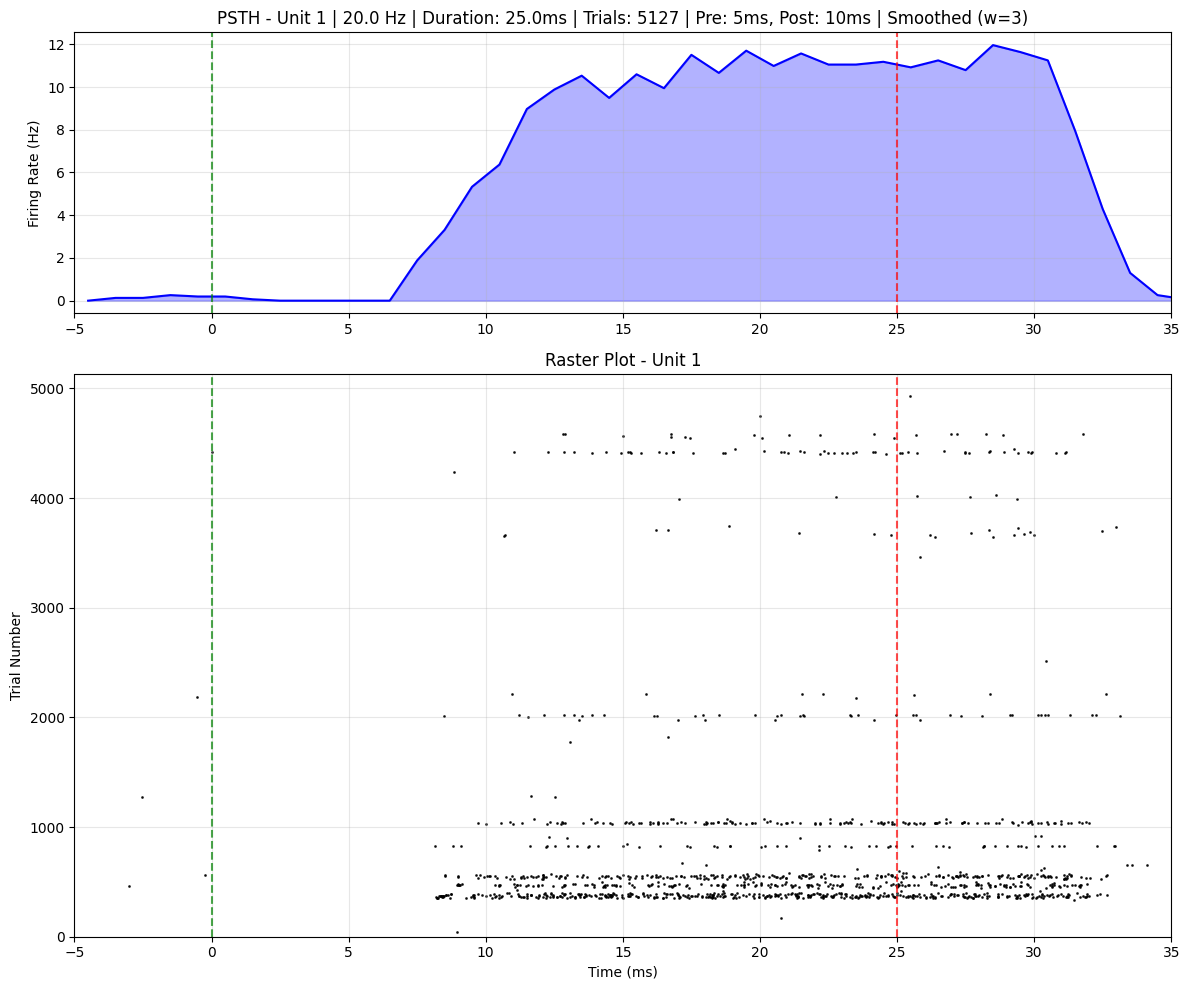

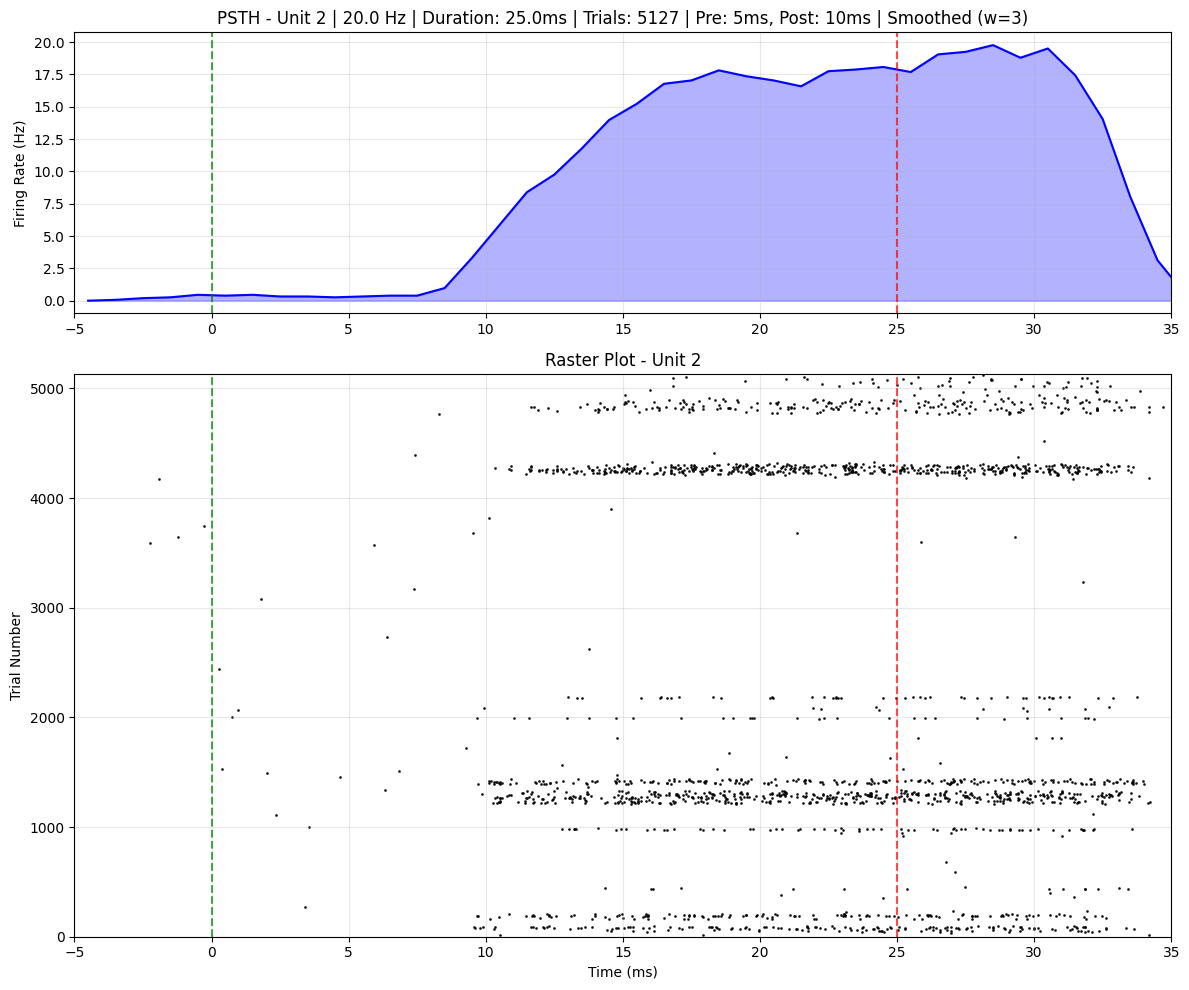

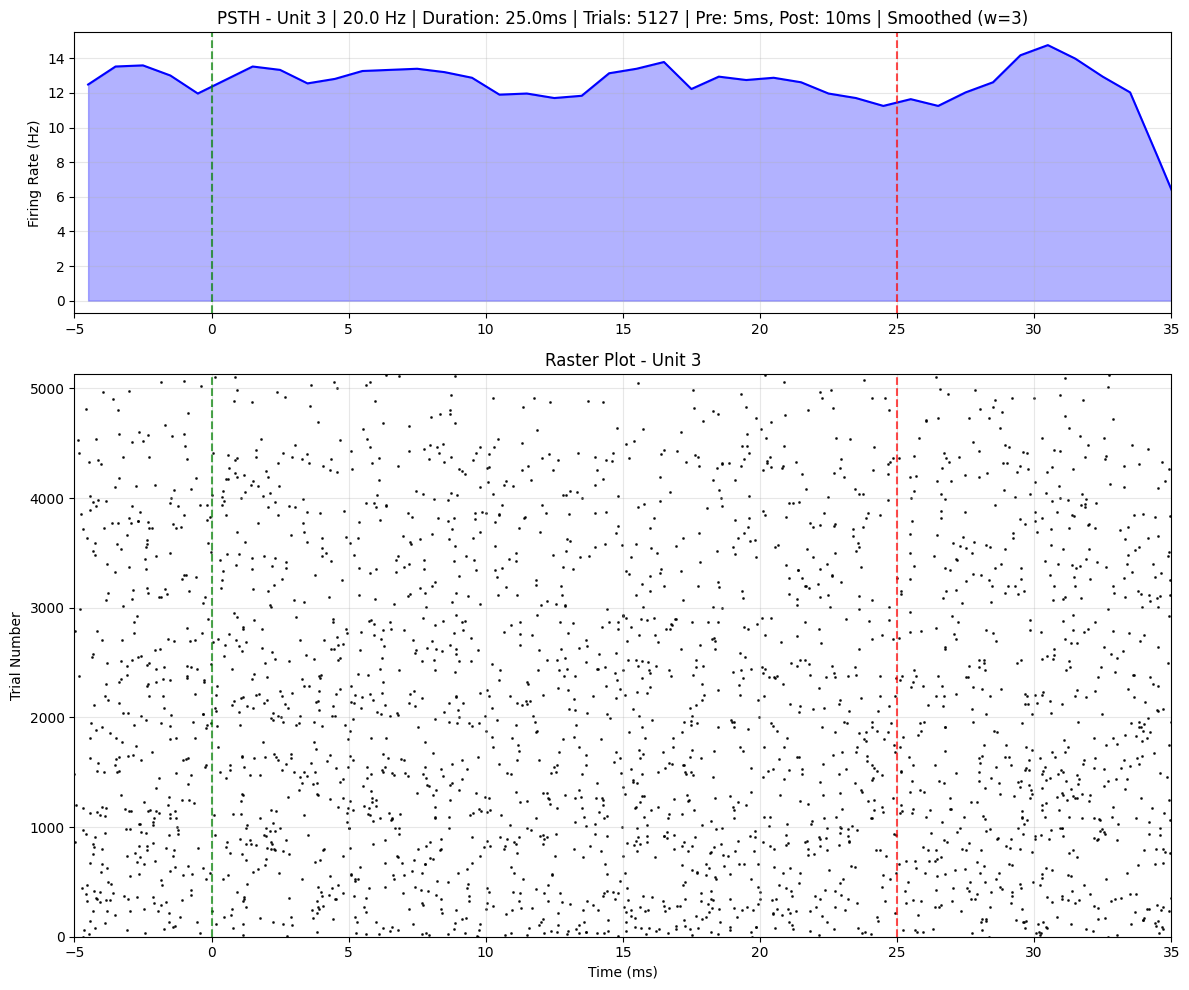

In [8]:
# Run PSTH analysis with digitalin.dat
results = run_psth_analysis_digitalin(
            unit=units,  # Can be single unit or list
            duration=duration,
            bin_size_ms=bin_size_ms,
            start_time=start_time,
            end_time=end_time,
            max_trials=max_trials,
            pre_interval_ms=pre_interval_ms,
            post_interval_ms=post_interval_ms,
            smooth_window=smooth_window,
            trial_ranges=trial_ranges,
            spikes_file=spikes_file,
            digitalin_file=digitalin_file,
            sampling_rate=sampling_rate,
            use_digitalin=True,  # Use digitalin.dat instead of CSV
            save=save_plots,
            output_path=output_path
        )
        


## Step 5: Compare CSV vs digitalin.dat Analysis (Optional)

Run the same analysis using CSV data for comparison.

In [ ]:
# Optional: Compare with CSV-based analysis
if os.path.exists(csv_intervals_file) and os.path.exists(spikes_file):
    print("Running comparison analysis with CSV data...")
    
    try:
        csv_results = run_psth_analysis_digitalin(
            unit=units[0],  # Just test first unit for comparison
            duration=duration,
            bin_size_ms=bin_size_ms,
            max_trials=max_trials,
            pre_interval_ms=pre_interval_ms,
            post_interval_ms=post_interval_ms,
            smooth_window=smooth_window,
            spikes_file=spikes_file,
            intervals_file=csv_intervals_file,
            use_digitalin=False,  # Use CSV instead of digitalin.dat
            save=False
        )
        
        if csv_results[0]:
            print(f"CSV analysis completed for Unit {units[0]}")
            plt.figure(csv_results[0].number)
            plt.suptitle(f"CSV Analysis - Unit {units[0]}", y=0.98)
            plt.show()
        
    except Exception as e:
        print(f"Error during CSV comparison: {e}")
        
else:
    print("CSV comparison not available - files not found.")

## Summary

This notebook demonstrates:

1. **Loading digitalin.dat files** - Binary digital input data with TTL events
2. **Extracting interval data** - From specific channels (0 for pico, 1 for time)
3. **PSTH analysis compatibility** - Same analysis pipeline as CSV-based workflow
4. **Validation and comparison** - Ensure results match expected formats

### Key Advantages:
- **Direct binary loading** - No need for CSV conversion
- **Precise timing** - Full sampling rate precision
- **Flexible channel mapping** - Configure which channels contain which signals
- **Compatible interface** - Drop-in replacement for existing analysis

### Next Steps:
- Adjust channel mappings if different from Channel 0 (pico) and Channel 1 (time)
- Modify sampling rate if not 30kHz
- Test with your specific digitalin.dat files
- Integrate into your existing analysis pipeline